<a href="https://colab.research.google.com/github/RSellathurai/LearningGo/blob/master/Mod7_16_Diabetes_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Diabetes in Patients Using Machine Learning Classification Models

This project aims to classify patients as diabetic or non-diabetic using the Pima Indians Diabetes Dataset ([Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv)), which includes key health indicators such as glucose levels, blood pressure, and BMI. Given the dataset’s class imbalance—where diabetes cases are less common—machine learning techniques are applied to improve detection accuracy. Through cross-validation, resampling methods, and hyperparameter tuning, this study explores how to build a reliable model for identifying diabetes cases, offering potential benefits for early diagnosis and targeted healthcare interventions.








In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Loading

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df = df[df.Insulin!=0]
df = df[df.BMI!=0]
df = df[df.Glucose!=0]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


# 2. Exploratory Data Analysis

In [ ]:
print("Number of rows and columns in the dataset")
print(df.shape)

Number of rows and columns in the dataset
(392, 9)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [ ]:
print("Descriptive statistics of numerical variables:")
df.describe()

Descriptive statistics of numerical variables:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


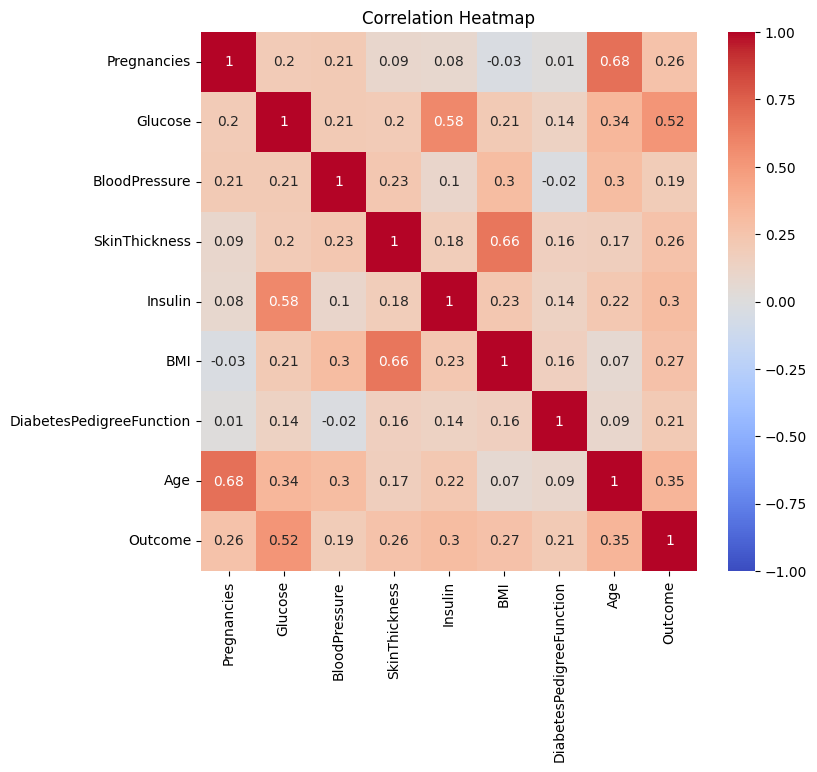

In [ ]:
corr_matrix = df.corr().round(2)

plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

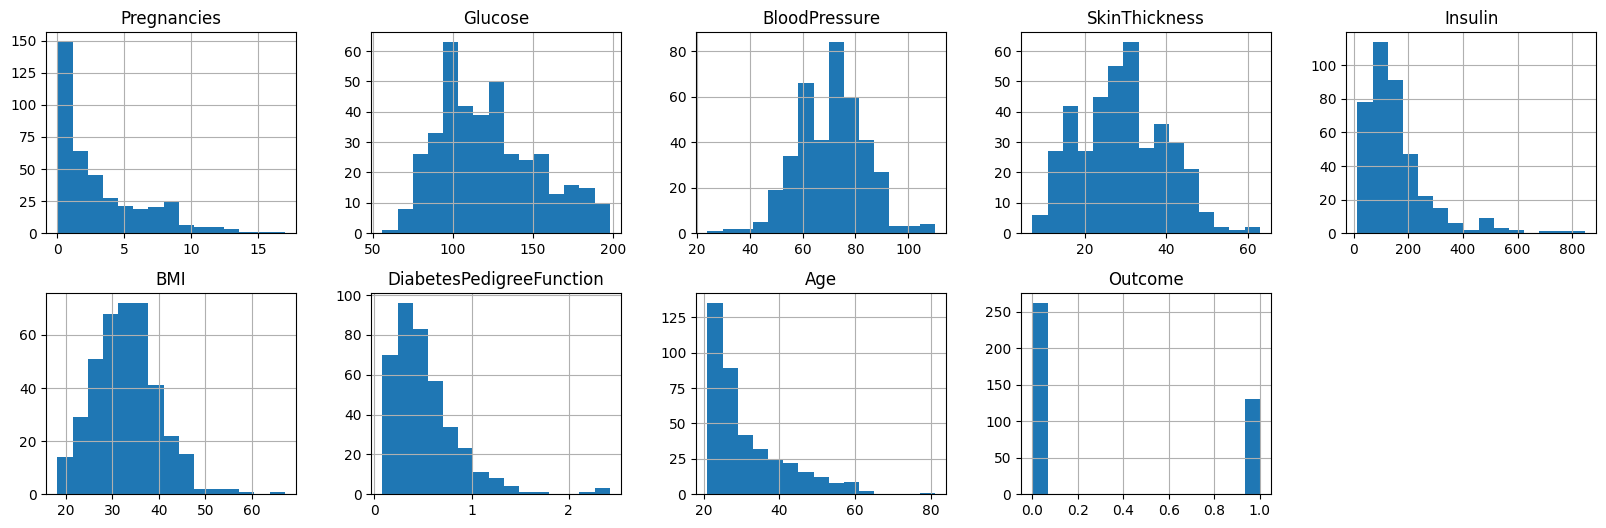

In [ ]:
df.hist(bins=15, figsize=(20, 6), layout=(2, 5))
plt.show()

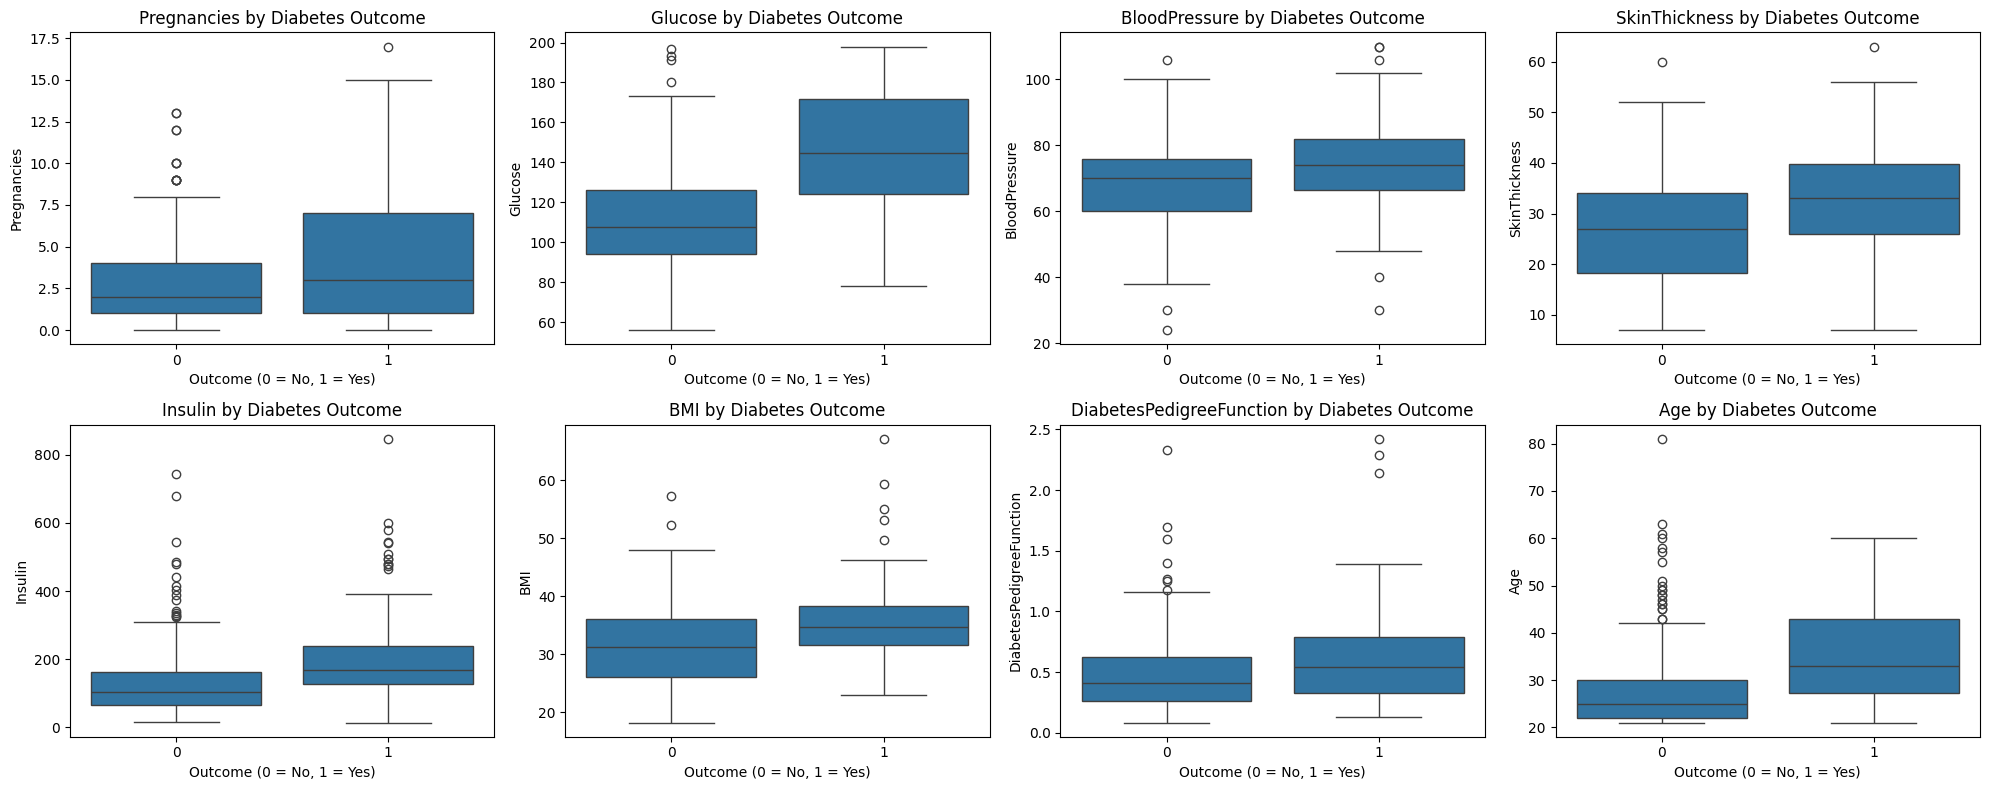

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(data=df, x='Outcome', y=col, ax=axes[i])
    axes[i].set_title(f"{col} by Diabetes Outcome")
    axes[i].set_xlabel("Outcome (0 = No, 1 = Yes)")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

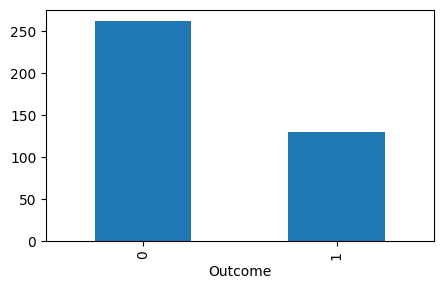

In [ ]:
df['Outcome'].value_counts().plot(kind='bar', figsize=(5, 3))
plt.show()

In [ ]:
df.Outcome.value_counts()

,count
Outcome,
0,262
1,130


In [ ]:
df.Outcome.value_counts(normalize=True)

,proportion
Outcome,
0,0.668367
1,0.331633


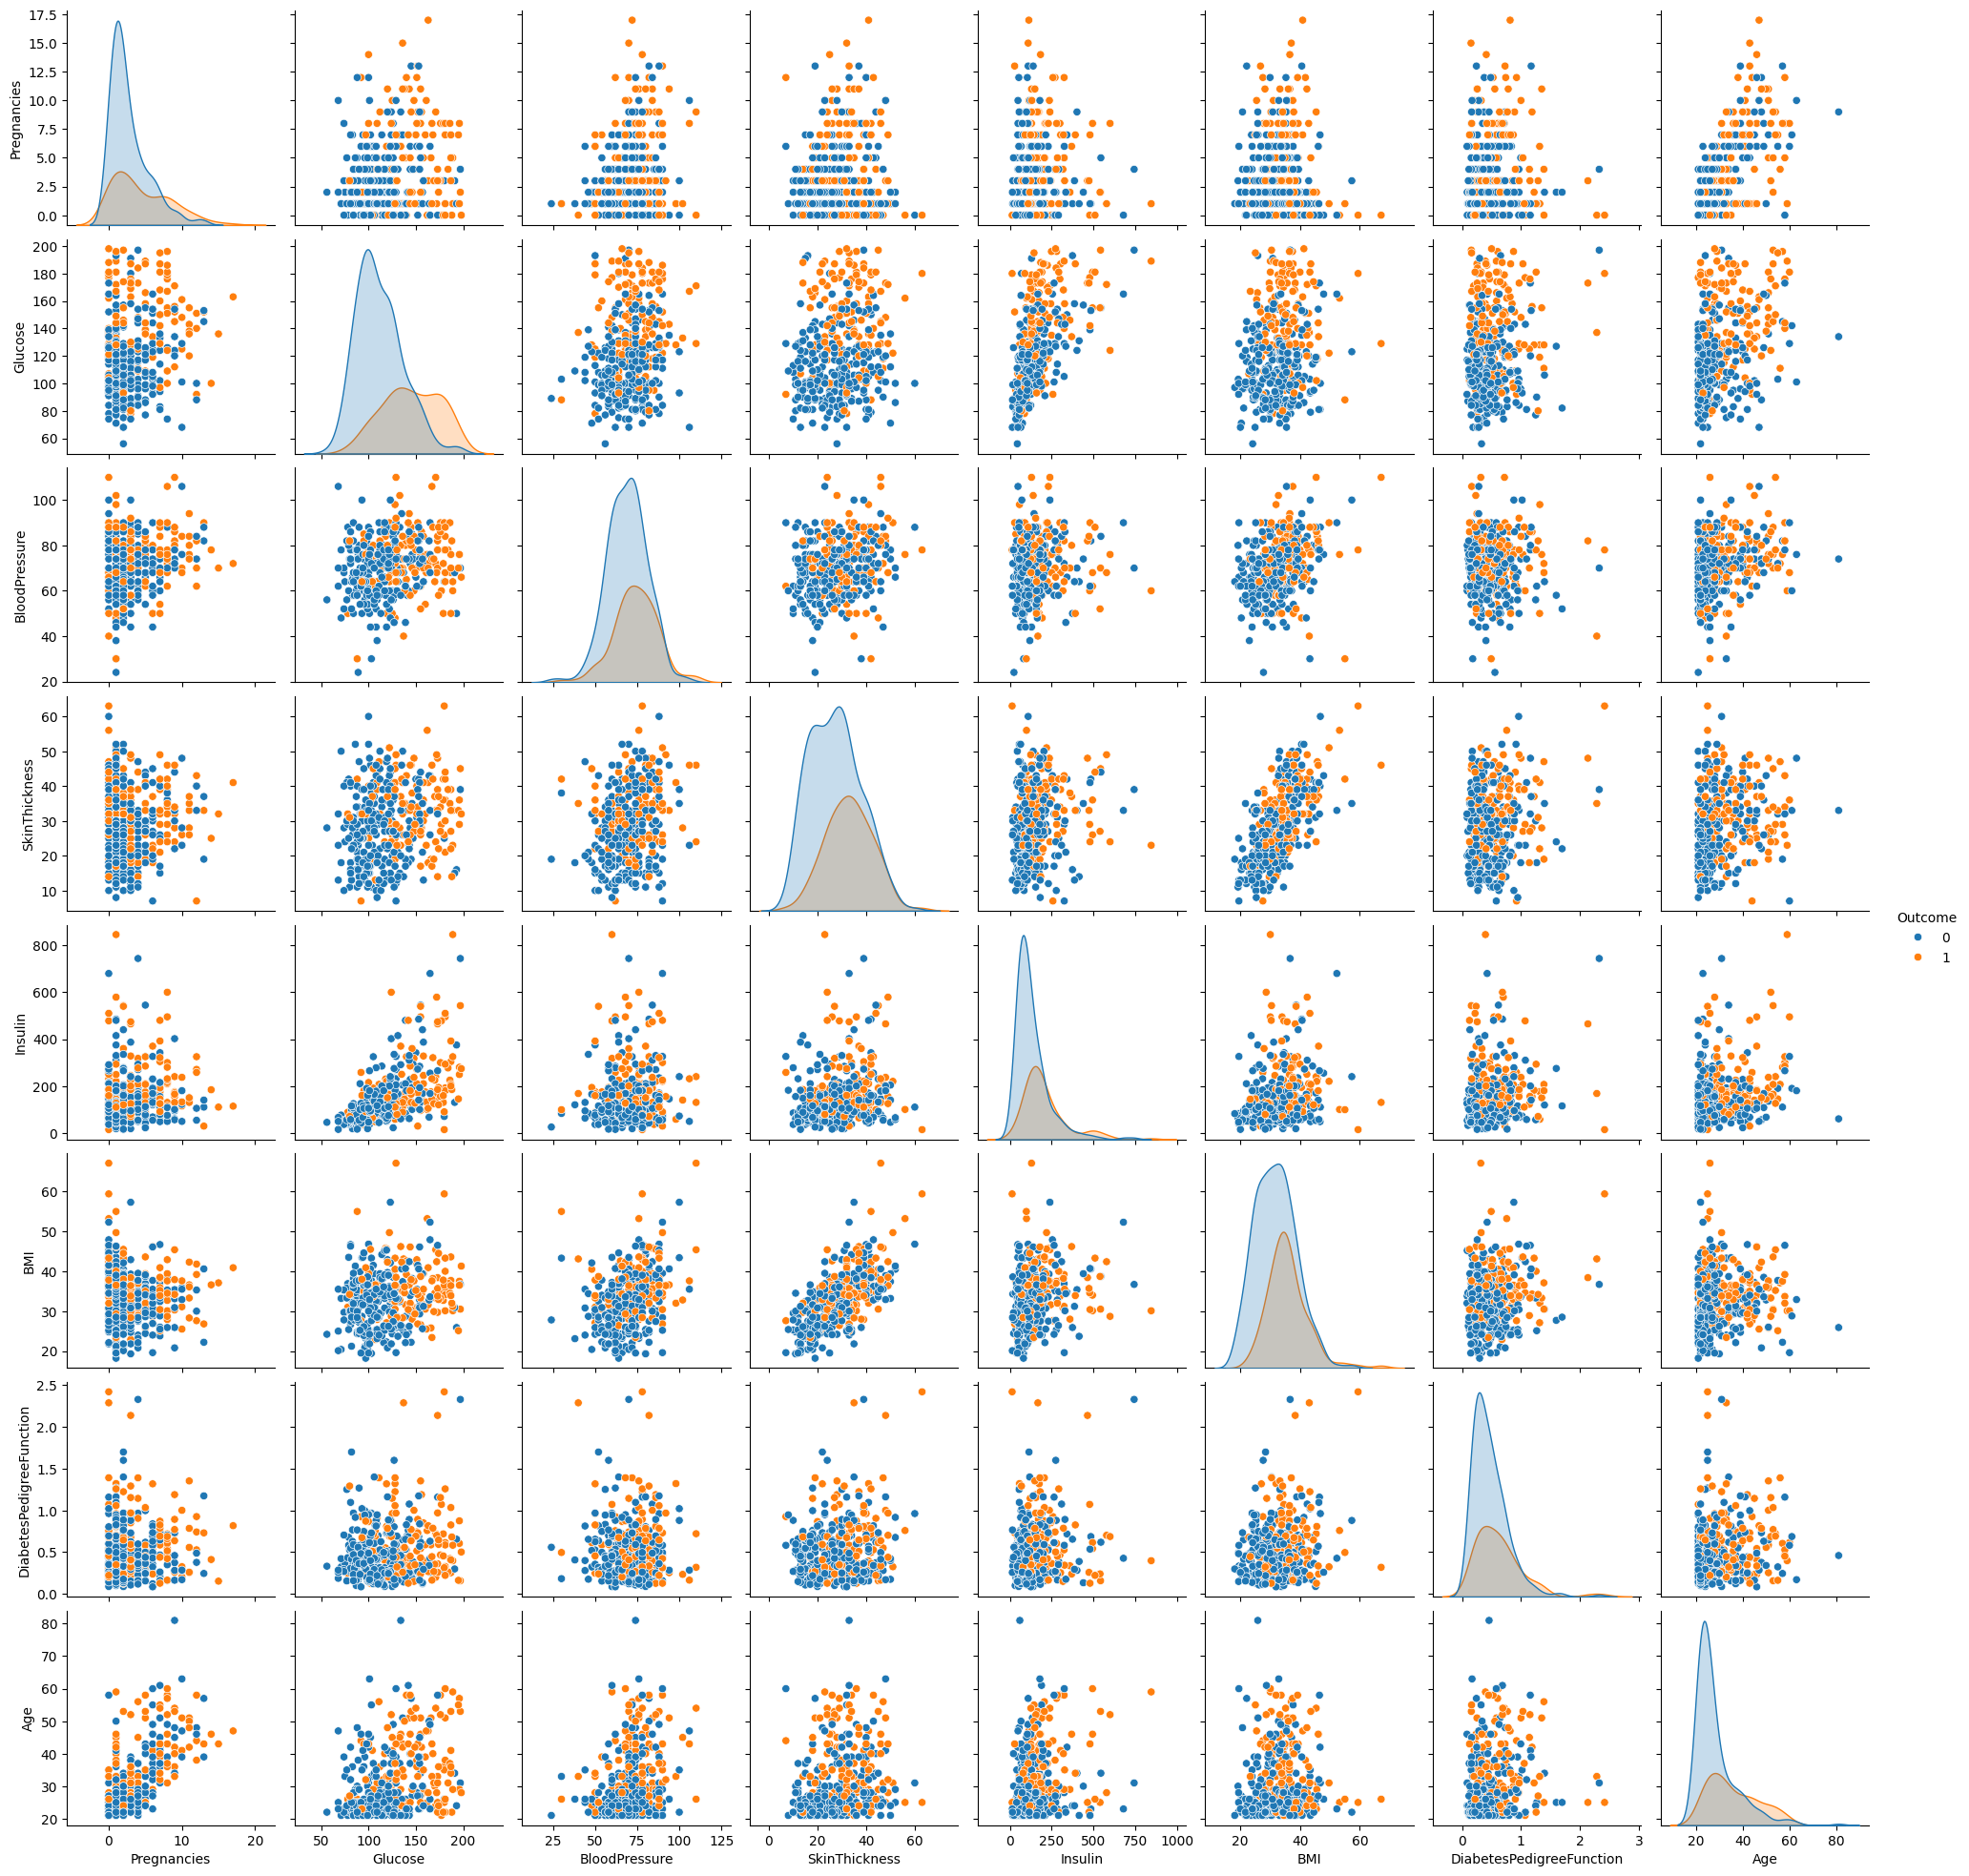

In [ ]:
sns.pairplot(df, hue="Outcome")
plt.show()

# 3. Train/Test split

Splitting your dataset is crucial to evaluate model generalization by ensuring that the model learns from a training set and is tested on a separate unseen test set, preventing overfitting and providing a reliable measure of performance on new data.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (313, 8). Training labels size: (313,)
Test set size: (79, 8). Test labels size: (79,)


<Figure size 400x300 with 0 Axes>

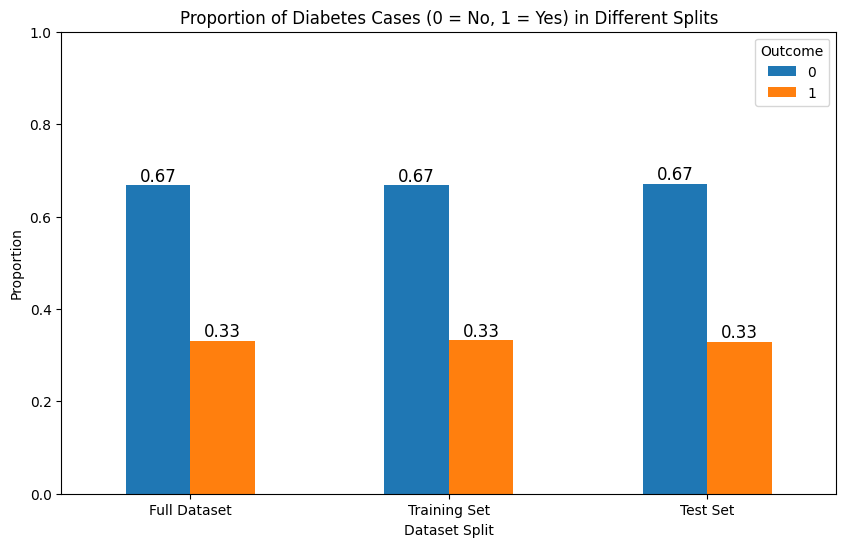

In [ ]:
y_distribution_df = pd.DataFrame({
    'Full Dataset': df['Outcome'].value_counts(normalize=True),
    'Training Set': y_train.value_counts(normalize=True),
    'Test Set': y_test.value_counts(normalize=True)
}).T

plt.figure(figsize=(4, 3))
ax = y_distribution_df.plot(kind='bar', figsize=(10, 6), rot=0)

plt.title("Proportion of Diabetes Cases (0 = No, 1 = Yes) in Different Splits")
plt.xlabel("Dataset Split")
plt.ylabel("Proportion")
plt.legend(title="Outcome")
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=12)

plt.show()

Since the dataset is unbalanced, you want to ensure that the diabetes' presence is adequately represented in both your training and test datasets.


For this, we used **stratified sampling** while splitting your dataset into training and testing sets. This ensures that the rare disease occurrence is proportionally represented in both sets.


In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [ ]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<Figure size 400x300 with 0 Axes>

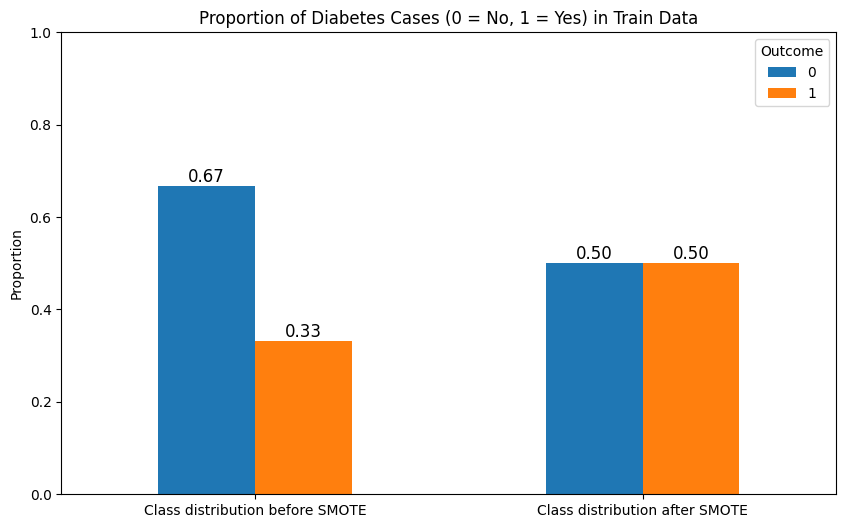

In [ ]:
y_train_distribution_df = pd.DataFrame({
    'Class distribution before SMOTE': y_train.value_counts(normalize=True),
    'Class distribution after SMOTE': y_train_resampled.value_counts(normalize=True)
}).T

plt.figure(figsize=(4, 3))
ax = y_train_distribution_df.plot(kind='bar', figsize=(10, 6), rot=0)

plt.title("Proportion of Diabetes Cases (0 = No, 1 = Yes) in Train Data")
plt.ylabel("Proportion")
plt.legend(title="Outcome")
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=12)

plt.show()

Even with stratified sampling, this dataset has an imbalance in the training set, which can lead to biased predictions favoring the majority class (non-diabetic cases). To address this, SMOTE (Synthetic Minority Over-sampling Technique) can be applied after splitting the data but before training the model. Instead of simply duplicating minority cases, SMOTE generates synthetic examples by interpolating between existing diabetic cases, creating a more balanced dataset. This ensures that the model is exposed to a more representative distribution during training, potentially improving its ability to detect diabetes cases accurately.

# 4. Feature Engineering

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('standard', StandardScaler(), ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']),  # Standard scaling for normally distributed features
    ('log', FunctionTransformer(np.log1p), ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age']),  # Log transform for skewed features
], remainder='passthrough')  # Keep any remaining columns as they are

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard', StandardScaler(),
                                 ['Glucose', 'BloodPressure', 'SkinThickness',
                                  'BMI']),
                                ('log',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['Pregnancies', 'Insulin',
                                  'DiabetesPedigreeFunction', 'Age'])])

In [ ]:
X_train_processed = preprocessor.fit(X_train_resampled) # Learning

In [ ]:
X_train_processed = preprocessor.transform(X_train_resampled)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
X_train_processed_df = pd.DataFrame(X_train_processed, columns=X_train_resampled.columns)
X_train_processed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.646144,1.133480,-0.267998,-0.719221,1.609438,4.615121,0.173113,3.332205
1,1.657585,1.217665,-0.267998,-0.040526,1.386294,5.056246,0.767327,3.970292
2,0.207853,1.386035,-1.420893,-0.179350,2.079442,5.049856,0.232698,3.637586
3,0.241568,0.207442,0.308450,-1.181968,2.302585,4.110874,0.378436,4.406719
4,-0.163008,-0.971151,-1.132669,-0.580397,1.098612,4.672829,0.540579,3.135494


In [ ]:
X_test_processed_df = pd.DataFrame(X_test_processed, columns=X_test.columns)
X_test_processed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.028446,-1.813003,0.308450,0.052024,2.079442,5.973810,0.602128,3.555348
1,-0.163008,0.375813,-0.267998,0.360521,1.098612,5.303305,0.394067,3.295837
2,1.017006,0.039072,-0.844445,-1.228242,0.693147,5.129899,0.116004,3.218876
3,0.308998,1.049294,0.500599,-0.811770,2.484907,4.875197,0.231112,3.761200
4,-0.331582,1.386035,-0.556221,0.144573,0.693147,4.983607,0.338613,3.713572


# 5. Classification Modeling

### Baseline performance
A baseline model helps us understand whether our machine learning model is actually learning patterns or just memorizing class imbalances. A random baseline (Dummy with stratified) shows performance without any predictive power, while a dummy majority-class baseline (Dummy with most_frequent) reveals whether the model is just favoring the dominant class. Comparing against these ensures that our model adds real value beyond guessing.

In [ ]:
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
random_baseline = DummyClassifier(strategy='stratified') # most_frequent for majority guess
random_baseline.fit(X_train_processed, y_train_resampled)
y_random_pred = random_baseline.predict(X_test_processed)

Baseline Accuracy: 0.43
Baseline Precision: 0.32
Baseline Recall: 0.65
Baseline F1 Score: 0.43


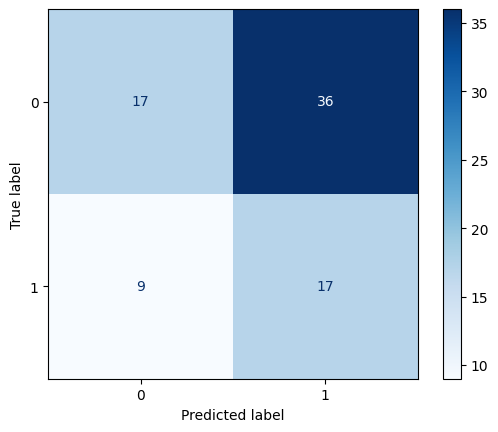

In [ ]:
# Calculate baseline metrics
accuracy_baseline = accuracy_score(y_test, y_random_pred)
precision_baseline = precision_score(y_test, y_random_pred, average='binary', zero_division=0)
recall_baseline = recall_score(y_test, y_random_pred, average='binary', zero_division=0)
f1_baseline = f1_score(y_test, y_random_pred, average='binary', zero_division=0)
cm = confusion_matrix(y_test, y_random_pred)

print(f"Baseline Accuracy: {accuracy_baseline:.2f}")
print(f"Baseline Precision: {precision_baseline:.2f}")
print(f"Baseline Recall: {recall_baseline:.2f}")
print(f"Baseline F1 Score: {f1_baseline:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.show()

We will start with the following models:
- Logistic Regression
- K-Nearest Neighboors (KNN)
- Random Forest
- Gradient Boosting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, KFold

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
results = []
trained_models = {}

for name, model in models.items():
    print(f"Training {name} ...")

    # Train the model on full training data and predict on the test set
    model.fit(X_train_processed_df, y_train_resampled)
    y_train_pred = model.predict(X_train_processed_df)
    y_test_pred = model.predict(X_test_processed_df)

    # Store trained model
    trained_models[name] = model

    # Compute train metrics
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_precision = precision_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)
    train_recall = recall_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)
    train_f1 = f1_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)

    # Compute test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='binary', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='binary', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='binary', zero_division=0)

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Train Precision": train_precision,
        "Train Recall": train_recall,
        "Train F1": train_f1,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1": test_f1,
    })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).sort_values(by="Test F1", ascending=False)

Training Logistic Regression ...
Training KNN ...
Training Random Forest ...
Training Gradient Boosting ...


In [ ]:
results_df

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression,0.787081,0.785714,0.789474,0.787589,0.797468,0.656250,0.807692,0.724138
1,KNN,0.830144,0.780488,0.918660,0.843956,0.759494,0.594595,0.846154,0.698413
2,Random Forest,1.000000,1.000000,1.000000,1.000000,0.759494,0.620690,0.692308,0.654545
3,Gradient Boosting,0.985646,0.976526,0.995215,0.985782,0.759494,0.620690,0.692308,0.654545


Cross-validation helps estimate a model's ability to generalize to unseen data by repeatedly training and validating it on different subsets of the training data. This provides a more reliable estimate of model performance compared to a single train-validation split, reducing the risk of overfitting before evaluating on the real test set.

In [ ]:
# Define cross-validation strategy (5-fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

results_cv = []

for name, model in models.items():
    print(f"CV for {name} ...")

    # Perform cross-validation and compute metrics for classification
    cv_accuracy_train = cross_val_score(model, X_train_processed_df, y_train_resampled, scoring="accuracy", cv=cv, n_jobs=-1)
    cv_precision_train = cross_val_score(model, X_train_processed_df, y_train_resampled, scoring="precision", cv=cv, n_jobs=-1)
    cv_recall_train = cross_val_score(model, X_train_processed_df, y_train_resampled, scoring="recall", cv=cv, n_jobs=-1)
    cv_f1_train = cross_val_score(model, X_train_processed_df, y_train_resampled, scoring="f1", cv=cv, n_jobs=-1)

    # Store results
    results_cv.append({
        "Model": name,
        "CV Accuracy": cv_accuracy_train.mean(),
        "CV Precision": cv_precision_train.mean(),
        "CV Recall": cv_recall_train.mean(),
        "CV F1 Score": cv_f1_train.mean(),
    })

# Convert results to a DataFrame and display
results_cv_df = pd.DataFrame(results_cv).sort_values(by="CV F1 Score", ascending=False)

CV for Logistic Regression ...
CV for KNN ...
CV for Random Forest ...
CV for Gradient Boosting ...


In [ ]:
results_cv_df.head()

,Model,CV Accuracy,CV Precision,CV Recall,CV F1 Score
2,Random Forest,0.834997,0.819491,0.861822,0.837109
3,Gradient Boosting,0.808606,0.794207,0.846056,0.817591
0,Logistic Regression,0.782444,0.791223,0.768118,0.777235
1,KNN,0.755881,0.718067,0.843602,0.774185


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define hyperparameter grids for classification models
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
        "solver": ["liblinear", "lbfgs"],  # Optimization algorithms
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],  # Number of neighbors
        "weights": ["uniform", "distance"],  # Weighting method
        "metric": ["euclidean", "manhattan"]  # Distance metric
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],  # Number of trees
        "max_depth": [None, 5, 10, 20],  # Tree depth
        "min_samples_split": [2, 5, 10]  # Minimum samples to split
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],  # Number of boosting stages
        "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinkage
        "max_depth": [3, 5, 7]  # Maximum tree depth
    }
}

In [ ]:
best_models = {}
best_params = {}
results_hyperparameter = []

for name, model in models.items():
    print(f"Training {name} ...")

    search = GridSearchCV(model, param_grid=param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    search.fit(X_train_processed_df, y_train_resampled)

    best_models[name] = search.best_estimator_
    best_params[name] = search.best_params_

    # Compute performance metrics on train and test sets
    y_train_pred = search.best_estimator_.predict(X_train_processed_df)
    y_test_pred = search.best_estimator_.predict(X_test_processed_df)

    # Compute train metrics
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_precision = precision_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)
    train_recall = recall_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)
    train_f1 = f1_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)

    # Compute test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='binary', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='binary', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='binary', zero_division=0)

    # Store results
    results_hyperparameter.append({
        "Model": name,
        "Best Params": search.best_params_,
        "Train Accuracy": train_accuracy,
        "Train Precision": train_precision,
        "Train Recall": train_recall,
        "Train F1": train_f1,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1": test_f1,
    })

# Store results in a pandas DataFrame and display
results_hyp_df = pd.DataFrame(results_hyperparameter)

Training Logistic Regression ...
Training KNN ...
Training Random Forest ...
Training Gradient Boosting ...


In [ ]:
results_hyp_df.sort_values(by="Test F1", ascending=False)

,Model,Best Params,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression,"{'C': 1, 'solver': 'lbfgs'}",0.787081,0.785714,0.789474,0.787589,0.797468,0.656250,0.807692,0.724138
2,Random Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",1.000000,1.000000,1.000000,1.000000,0.797468,0.666667,0.769231,0.714286
3,Gradient Boosting,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",1.000000,1.000000,1.000000,1.000000,0.772152,0.633333,0.730769,0.678571
1,KNN,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",1.000000,1.000000,1.000000,1.000000,0.708861,0.542857,0.730769,0.622951


# 7. Selecting best model

In [ ]:
best_models['Logistic Regression'].get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
best_model_pred_y_train = best_models['Logistic Regression'].predict(X_train_processed)
best_model_pred_y_test = best_models['Logistic Regression'].predict(X_test_processed)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Train set
Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79


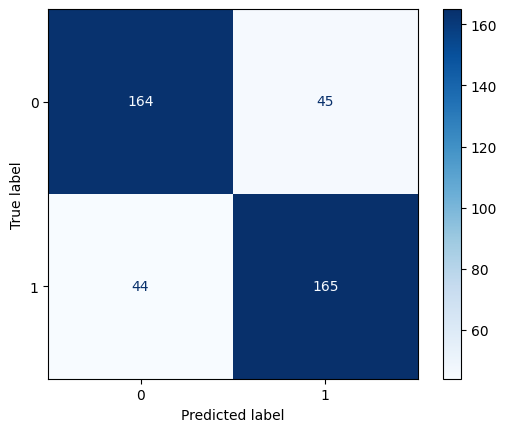

In [ ]:
# Calculate metrics on train set
accuracy_train = accuracy_score(y_train_resampled, best_model_pred_y_train)
precision_train = precision_score(y_train_resampled, best_model_pred_y_train, average='binary', zero_division=0)
recall_train = recall_score(y_train_resampled, best_model_pred_y_train, average='binary', zero_division=0)
f1_train = f1_score(y_train_resampled, best_model_pred_y_train, average='binary', zero_division=0)
cm_train = confusion_matrix(y_train_resampled, best_model_pred_y_train)

print(f"Train set")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.show()

Test set
Accuracy: 0.80
Precision: 0.66
Recall: 0.81
F1 Score: 0.72


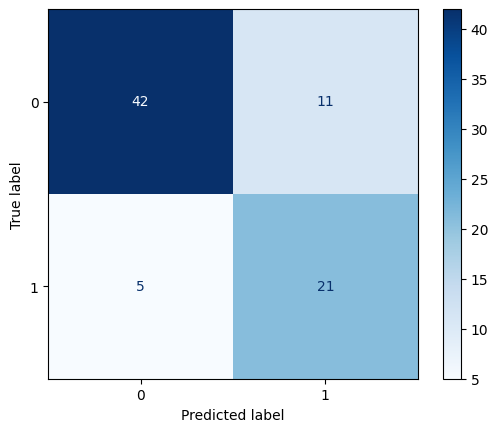

In [ ]:
# Calculate metrics on test set
accuracy_test = accuracy_score(y_test, best_model_pred_y_test)
precision_test = precision_score(y_test, best_model_pred_y_test, average='binary', zero_division=0)
recall_test = recall_score(y_test, best_model_pred_y_test, average='binary', zero_division=0)
f1_test = f1_score(y_test, best_model_pred_y_test, average='binary', zero_division=0)
cm_test = confusion_matrix(y_test, best_model_pred_y_test)

print(f"Test set")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.show()

- The model correctly classifies 80% of cases, which is good but not always the best metric for imbalanced datasets.

- The model prioritizes recall (detecting true diabetes cases) over precision. It successfully identifies 81% of actual diabetes cases (high recall). However, precision is lower (66%), meaning some false positives exist (predicting diabetes when the person doesn't have it).

<hr>

- The model is good at catching diabetes cases (high recall), meaning fewer missed diagnoses.

- However, it has some false positives (lower precision), which could lead to unnecessary medical tests.

- If recall is the priority (to avoid missing diabetic patients), this model is decent.

- If precision needs improvement, additional tuning (e.g., threshold adjustment, different classifier, or feature engineering) might be necessary.

# 8. Model interpretation

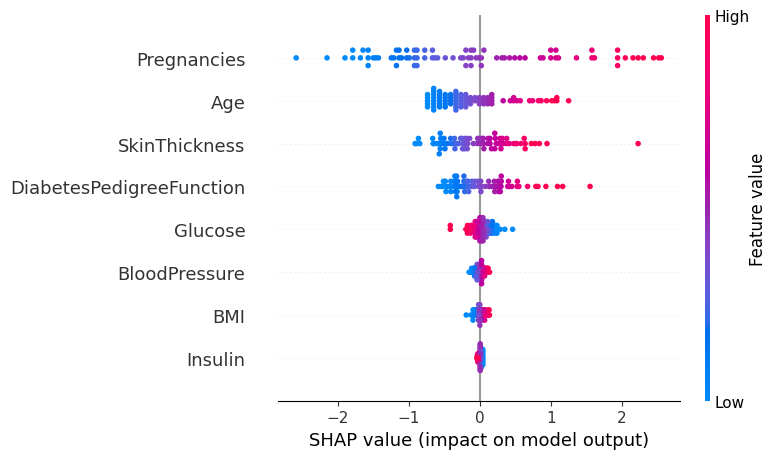

In [ ]:
import shap
# Use SHAP's LinearExplainer for logistic regression
explainer = shap.LinearExplainer(best_models['Logistic Regression'], X_train_processed_df)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_processed_df)

shap.summary_plot(shap_values, X_test_processed_df)

This SHAP (SHapley Additive Explanations) summary plot shows how each feature impacts the model's predictions.

How to understand this:

- x-axis (Impact on Model Output)
  - Negative values decrease the likelihood of diabetes.
  - Positive values increase the likelihood of diabetes.
- y-axis (Model Features)
  - The order of the features on the Y-axis is based on overall importance.
- Color (Feature Value Intensity)
  - Red → Feature is at its higher range.
  - Blue → Feature is at its lower range.

# 9. Results

### Main takeaways
- The model performs reasonably well in predicting diabetes, with an accuracy of 80% and an F1-score of 0.72, suggesting a good balance between precision and recall.
- Recall (0.81) is higher than Precision (0.66), indicating that the model prioritizes detecting diabetes cases correctly at the expense of some false positives.
- SHAP analysis reveals that key predictors of diabetes include Glucose levels, Age, BMI, and Pregnancy history, aligning with medical knowledge. They should be closely monitored for diabetes risk assessment.

### Conclusions
- Use this model in health clinics and hospitals to flag high-risk patients before symptoms worsen.
- Patients with high BMI should receive early lifestyle interventions (e.g., diet and exercise programs).


### Future work
- Reduce false positives by tuning classification thresholds.
- Look into feature engineering a bit more.
- Track patients over time and predict the progression of diabetes risk instead of static predictions.

# 10. Save model

In [ ]:
import pickle
import joblib

preprocessor_filename = "preprocessor.pkl"
with open(preprocessor_filename, "wb") as file:
    pickle.dump(preprocessor, file)

# Save the trained model to a file so it can be used later for predictions
model_filename = "best_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(best_models['Logistic Regression'], file)

print("Saved successfully!")

Saved successfully!


# 11. Implementation

In [ ]:
def predict_diabetes(observation):
    """
    Predicts whether a person has diabetes using a trained Logistic Regression model.

    Args:
        observation (dict or pd.DataFrame): A single patient's data as a dictionary or DataFrame row.

    Returns:
        int: Prediction (0 = No Diabetes, 1 = Diabetes)
    """
    with open("best_model.pkl", "rb") as file:
        model = pickle.load(file)

    with open("preprocessor.pkl", "rb") as file:
        preprocessor = pickle.load(file)

    # Convert observation to DataFrame if needed
    if isinstance(observation, dict):
        observation = pd.DataFrame([observation])  # Convert single dictionary to DataFrame

    observation_processed = preprocessor.transform(observation)
    observation_processed = pd.DataFrame(observation_processed, columns=model.feature_names_in_)

    # Make prediction and get probability scores
    probabilities = model.predict_proba(observation_processed)[0]  # Get probability for both classes
    prediction = model.predict(observation_processed)[0]  # Extract single prediction

    # Get certainty as the probability of the predicted class
    certainty = probabilities[prediction] * 100

    # Compute SHAP values
    explainer = shap.LinearExplainer(model, X_train_processed_df)
    shap_values = explainer(observation_processed)

    # Generate SHAP plot
    shap.waterfall_plot(shap_values[0])
    plt.show()

    return prediction, certainty

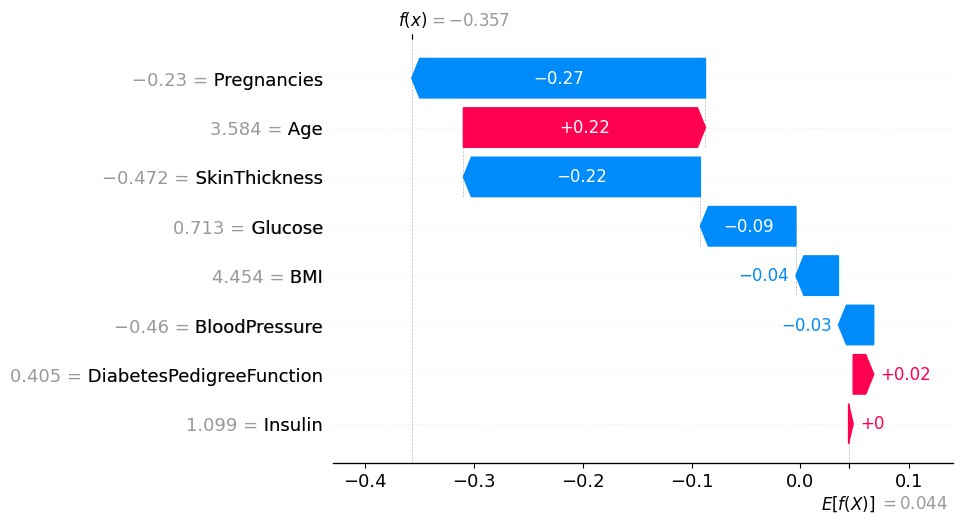

Diabetes Prediction: Not Diabetic
Model Certainty: 58.84%


In [ ]:
# Example input: A single patient's data (dictionary format)
observation = {
    "Pregnancies": 2,
    "Glucose": 120,
    "BloodPressure": 80,
    "SkinThickness": 25,
    "Insulin": 85,
    "BMI": 30.5,
    "DiabetesPedigreeFunction": 0.5,
    "Age": 35
}


prediction, certainty = predict_diabetes(observation)

print(f"Diabetes Prediction: {'Diabetic' if prediction == 1 else 'Not Diabetic'}")
print(f"Model Certainty: {certainty:.2f}%")